In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import import_ipynb
from environment import GameOfLifeEnv
from utils import *

In [5]:
def Q_Learning(Q, env, N_games=100, alpha=0.50, gamma=0.9, eps=0.1):
    
    for game in range(N_games):
        state = env.reset().copy()
#         print('inital state id: ', get_state_id(state),'\n inital state: \n', state)

        done = False
        i=0
        while not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)
            
            a = take_epsilon_greedy_action(Q[state_id, :], eps, all_actions)

            state_p, r, done = env.step(a)
            state_p_id = get_state_id(state_p)

            # update value function
            Q[state_id, a] += alpha * (r + gamma*np.max(Q[state_p_id, :]) - Q[state_id, a])
        
            # update states
            state = state_p
            i +=1
#         print(f'Game No {game} finished in {i} steps.')

    return Q

In [29]:
%matplotlib inline

def plot_after_avg(env, Q, trained_for):
    max_gen_to_plot = 20
    eps = 0
    fig, ax = plt.subplots()

    all_rewards_Q = np.zeros(max_gen_to_plot)
    all_rewards_no_action = np.zeros_like(all_rewards_Q)
    all_rewards_r = np.zeros_like(all_rewards_Q)

    # actions from the Q function
    N_games = 1
    for i in range(N_games):
        state = env.reset()
        rewards_Q = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_Q)):
            if not done:
                all_actions = np.arange(len(state)**2)
                state_id = get_state_id(state)

                a = take_epsilon_greedy_action(Q[state_id, :], eps, all_actions)

                state_p, r, done = env.step(a)
                state = state_p
                rewards_Q[j] = r
        all_rewards_Q = all_rewards_Q + rewards_Q
    avg_Q = all_rewards_Q / N_games

    # base evolution
    N_games = 1
    for i in range(N_games):
        env.reset()
        rewards_no_action = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_no_action)):
            if not done:
                _, r, done = env.step(None)
                rewards_no_action[j] = r

        all_rewards_no_action = all_rewards_no_action + rewards_no_action
    avg_no_action = all_rewards_no_action / N_games

    # taking random actions
    N_games = 1
    for i in range(N_games):
        state = env.reset()
        rewards_r = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_r)):
            if not done:
                a = take_random_action(state)
                _, r, done = env.step(a)
                rewards_r[j] = r
        all_rewards_r = all_rewards_r + rewards_r
    avg_random = all_rewards_r / N_games

    ax.set_title(f'Rewards averaged over 50 games after Q-learning for a fixed initial state')
    ax.plot(avg_no_action[:max_gen_to_plot], linewidth = 2, label='without agent')
    ax.plot(avg_random[:max_gen_to_plot], linewidth = 2, label='taking random actions')
    ax.plot(avg_Q[:max_gen_to_plot], linewidth = 2, label='using learned Q-function')

    plt.legend()
    ax.set_xlabel('generations')
    ax.set_ylabel('reward')
    name = f'figs/project/za_import'
    plt.savefig(name, transparent=True, bbox_inches='tight')

# Training with fixed initial state

In [23]:
# WARNING: RUN ONLY ONCE

env = GameOfLifeEnv(grid_size=4, density=0.5, seed=52, max_generations=300)
Q_fixed_state = np.zeros((2**(env.grid_size**2), env.grid_size**2))
total_games_trained_fixed = 0
alpha = 0.5
gamma = 1
eps = 0.1

In [24]:
# use this cell after restart

# Q_fixed_state = np.loadtxt('Q_function_fixed_state')

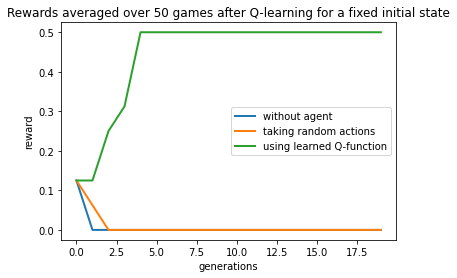

In [30]:
##########################################################################
env = GameOfLifeEnv(grid_size=4, density=0.5, seed=442, max_generations=50)
N_games = 200
eps = 0.1
Q_fixed_state = Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
total_games_trained_fixed += N_games

plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)

##########################################################################
# N_games = 300
# eps = 0.5
# Q_fixed_state = Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
# total_games_trained_fixed += N_games

# plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)

# # ##########################################################################
# N_games = 500
# eps = 0.3
# alpha = 0.3
# Q_fixed_state = Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
# total_games_trained_fixed += N_games

# plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)


# filename = f'Q_seed{env.seed}_trained_for_{total_games_trained_fixed}'
# np.savetxt(filename, Q_fixed_state, newline="\n")

In [28]:
# N_games = 2000
# Q_fixed_state = Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
# total_games_trained_fixed += N_games
# np.savetxt('v2_Q_function_fixed_state', Q_fixed_state, newline="\n")

In [17]:
# see final state
env = GameOfLifeEnv(grid_size=4, density=0.5, max_generations=50, save_states=True)

state = env.reset()
print(state)
done = False
for j in range(50):
    if not done:
        all_actions = np.arange(len(state)**2)
        state_id = get_state_id(state)
        eps = 0
        a = take_epsilon_greedy_action(Q_fixed_state[state_id, :], eps, all_actions)

        state_p, r, done = env.step(a)
        state = state_p
#         print(j, state)

%matplotlib notebook
env.render()



[[0 0 0 0]
 [0 1 1 1]
 [1 0 1 1]
 [1 1 1 0]]


<IPython.core.display.Javascript object>

In [29]:
visited_states = 0
for e, i in enumerate(Q_fixed_state): 
    if np.sum(i) > 0:
        visited_states += 1
print(f'Trained for a total of {total_games_trained_fixed} games, visited states: {visited_states}/{len(Q_fixed_state)}')

Trained for a total of 5000 games, visited states: 1143/65536


## Plotting the evolution of density after training for a fixed initial state

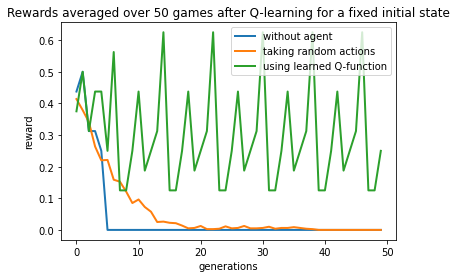

In [30]:
%matplotlib inline

Q_fixed = Q_fixed_state
N_games = 50
eps = 0
fig, ax = plt.subplots()

all_rewards_Q = np.zeros(200)
all_rewards_no_action = np.zeros_like(all_rewards_Q)
all_rewards_r = np.zeros_like(all_rewards_Q)

# Averaging density for a fixed initial state taking actions from the Q function
for i in range(N_games):
    state = env.reset()
    rewards_Q = np.zeros(200)
    done = False
    for j in range(len(rewards_Q)):
        if not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)

            a = take_epsilon_greedy_action(Q_fixed[state_id, :], eps, all_actions)

            state_p, r, done = env.step(a)
            state = state_p
            rewards_Q[j] = r
        else: rewards_Q[j] = 0
    all_rewards_Q = all_rewards_Q + rewards_Q
#     ax.plot(rewards_Q[:50], linestyle = '--')
avg_Q = all_rewards_Q / N_games

# rewards for a fixed initial state, natural evolution
state = env.reset()
rewards_no_action = np.zeros(200)
done = False
for j in range(len(rewards_no_action)):
    if not done:
        state_p, r, done = env.step(None)
        state = state_p
        rewards_no_action[j] = r
    else: rewards_no_action[j] = 0
avg_no_action = rewards_no_action

# # Averaging rewards for a fixed initial state taking random actions
for i in range(N_games):
    state = env.reset()
    rewards_r = np.zeros(200)
    done = False
    for j in range(len(rewards_r)):
        if not done:
            a = take_random_action(state)
            state_p, r, done = env.step(a)
            state = state_p
            rewards_r[j] = r
        else: rewards_r[j] = 0
    all_rewards_r = all_rewards_r + rewards_r
avg_random = all_rewards_r / N_games

ax.set_title(f'Rewards averaged over {N_games} games after Q-learning for a fixed initial state')
ax.plot(avg_no_action[:50], linewidth = 2, label='without agent')
ax.plot(avg_random[:50], linewidth = 2, label='taking random actions')
ax.plot(avg_Q[:50], linewidth = 2, label='using learned Q-function')

plt.legend()
ax.set_xlabel('generations')
ax.set_ylabel('reward')
plt.savefig('figs/v2_rewards_fixed_5000', transparent=True, bbox_inches='tight')

# Training with random initial state

In [32]:
# WARNING: RUN ONLY ONCE

env_no_seed = GameOfLifeEnv(grid_size=4, density=0.4)
Q = np.zeros((2**(env_no_seed.grid_size**2), env_no_seed.grid_size**2))
total_games_trained = 0
alpha = 0.5
gamma = 1.0
eps = 0.15

In [ ]:
# use this cell after restart

# Q = np.loadtxt('Q_function')

In [31]:
env_no_seed = GameOfLifeEnv(grid_size=4)
alpha = 0.5
gamma = 1.0
eps = 0.15

In [36]:
N_games = 1000
Q = Q_Learning(Q, env_no_seed, N_games, alpha, gamma, eps)
total_games_trained += N_games
np.savetxt('v2_Q_function', Q, newline="\n")

In [34]:
visited_states = 0
for e, i in enumerate(Q): 
    if np.sum(i) > 0:
        visited_states += 1
print(f'Trained for a total of {total_games_trained} games, visited states: {visited_states}/{len(Q)}')

Trained for a total of 1000 games, visited states: 2969/65536


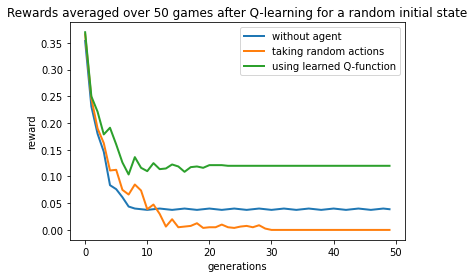

In [35]:
%matplotlib inline

Q_no_seed = Q
N_games = 50
eps = 0
fig, ax = plt.subplots()

all_rewards_Q = np.zeros(200)
all_rewards_no_action = np.zeros_like(all_rewards_Q)
all_rewards_r = np.zeros_like(all_rewards_Q)

# Averaging density for a random initial state taking actions from the Q function
for i in range(N_games):
    state = env_no_seed.reset()
    rewards_Q = np.zeros(200)
    done = False
    for j in range(len(rewards_Q)):
        if not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)

            a = take_epsilon_greedy_action(Q_no_seed[state_id, :], eps, all_actions)

            state_p, r, done = env_no_seed.step(a)
            state = state_p
            rewards_Q[j] = r
        else: rewards_Q[j] = 0
    all_rewards_Q = all_rewards_Q + rewards_Q
#     ax.plot(rewards_Q[:50], linestyle = '--')
avg_Q = all_rewards_Q / N_games

# Averaging density for a random initial state, natural evolution
for i in range(N_games):
    state = env_no_seed.reset()
    rewards_no_action = np.zeros(200)
    done = False
    for j in range(len(rewards_no_action)):
        if not done:
            state_p, r, done = env_no_seed.step(None)
            state = state_p
            rewards_no_action[j] = r
        else: rewards_no_action[j] = 0
    all_rewards_no_action = all_rewards_no_action + rewards_no_action
#     ax.plot(rewards_no_action[:50], linestyle = 'dotted')
avg_no_action = all_rewards_no_action / N_games

# # Averaging for a random initial state taking random actions
for i in range(N_games):
    state = env_no_seed.reset()
    rewards_r = np.zeros(200)
    done = False
    for j in range(len(rewards_r)):
        if not done:
            a = take_random_action(state)
            state_p, r, done = env_no_seed.step(a)
            state = state_p
            rewards_r[j] = r
        else: rewards_r[j] = 0
    all_rewards_r = all_rewards_r + rewards_r
avg_random = all_rewards_r / N_games

ax.set_title(f'Rewards averaged over {N_games} games after Q-learning for a random initial state')
ax.plot(avg_no_action[:50], linewidth = 2, label='without agent')
ax.plot(avg_random[:50], linewidth = 2, label='taking random actions')
ax.plot(avg_Q[:50], linewidth = 2, label='using learned Q-function')

plt.legend()
ax.set_xlabel('generations')
ax.set_ylabel('reward')
plt.savefig('figs/v2_rewards_no_seed_1000', transparent=True, bbox_inches='tight')

In [10]:

env = GameOfLifeEnv(grid_size=4)
Qtest = np.zeros((2**(env.grid_size**2), env.grid_size**2))
total_games_trained_fixed = 0
alpha = 0.5
gamma = 1
eps = 0.1
N_games = 2000
Qtest = Q_Learning(Qtest, env, N_games, alpha, gamma, eps)


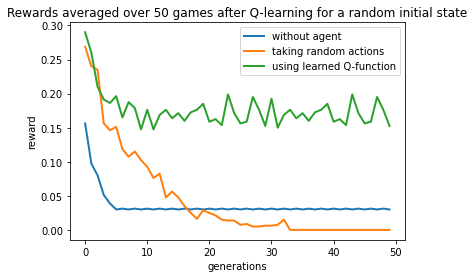

In [16]:

Q_no_seed = Qtest
N_games = 50
eps = 0
fig, ax = plt.subplots()

all_rewards_Q = np.zeros(200)
all_rewards_no_action = np.zeros_like(all_rewards_Q)
all_rewards_r = np.zeros_like(all_rewards_Q)

# Averaging density for a random initial state taking actions from the Q function
for i in range(N_games):
    state = env.reset()
    rewards_Q = np.zeros(200)
    done = False
    for j in range(len(rewards_Q)):
        if not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)

            a = take_epsilon_greedy_action(Q_no_seed[state_id, :], eps, all_actions)
            state_p, r, done = env.step(a)
#             print(a, state_p)
            state = state_p
            rewards_Q[j] = r
    all_rewards_Q = all_rewards_Q + rewards_Q
#     ax.plot(rewards_Q[:50], linestyle = '--')
avg_Q = all_rewards_Q / N_games

# Averaging density for a random initial state, natural evolution
for i in range(N_games):
    state = env.reset()
    rewards_no_action = np.zeros(200)
    done = False
    for j in range(len(rewards_no_action)):
        if not done:
            state_p, r, done = env.step(None)
            state = state_p
            rewards_no_action[j] = r
    all_rewards_no_action = all_rewards_no_action + rewards_no_action
#     ax.plot(rewards_no_action[:50], linestyle = 'dotted')
avg_no_action = all_rewards_no_action / N_games

# # Averaging for a random initial state taking random actions
for i in range(N_games):
    state = env.reset()
    rewards_r = np.zeros(200)
    done = False
    for j in range(len(rewards_r)):
        if not done:
            a = take_random_action(state)
            state_p, r, done = env.step(a)
            state = state_p
            rewards_r[j] = r
    all_rewards_r = all_rewards_r + rewards_r
avg_random = all_rewards_r / N_games

ax.set_title(f'Rewards averaged over {N_games} games after Q-learning for a random initial state')
ax.plot(avg_no_action[:50], linewidth = 2, label='without agent')
ax.plot(avg_random[:50], linewidth = 2, label='taking random actions')
ax.plot(avg_Q[:50], linewidth = 2, label='using learned Q-function')

plt.legend()
ax.set_xlabel('generations')
ax.set_ylabel('reward')
plt.savefig('figs/v2_rewards_no_seed_2000', transparent=True, bbox_inches='tight')

In [47]:
print(env.seed)

42
